In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Set Seaborn style for a cleaner look
sns.set(style="whitegrid")

In [2]:
df = pd.read_csv("./data/radcure/clinical_ptyped.csv")
df

,age,sex,disease site,t stage,n stage,hpv combined,chemo?,ecog,stage,phenotype
0,66.7,male,larynx,t3,n0,NaN,0,0.0,iii,0
1,68.4,female,hypopharynx,t2,n2b,NaN,0,1.0,iva,0
2,49.7,female,nasopharynx,t1,n2,NaN,1,1.0,iii,1
3,88.5,male,oropharynx,t2,n2a,NaN,0,2.0,iva,0
4,69.8,male,oropharynx,t3,n2b,"yes, positive",0,0.0,iva,0
...,...,...,...,...,...,...,...,...,...,...
1795,68.3,male,oropharynx,t2,n2b,"yes, positive",0,1.0,iva,0
1796,53.9,male,larynx,t2,n0,NaN,0,0.0,ii,0
1797,58.3,male,oropharynx,t2,n0,"yes, positive",0,0.0,ii,0
1798,52.4,female,oropharynx,t2,n2b,"yes, positive",1,0.0,iva,0


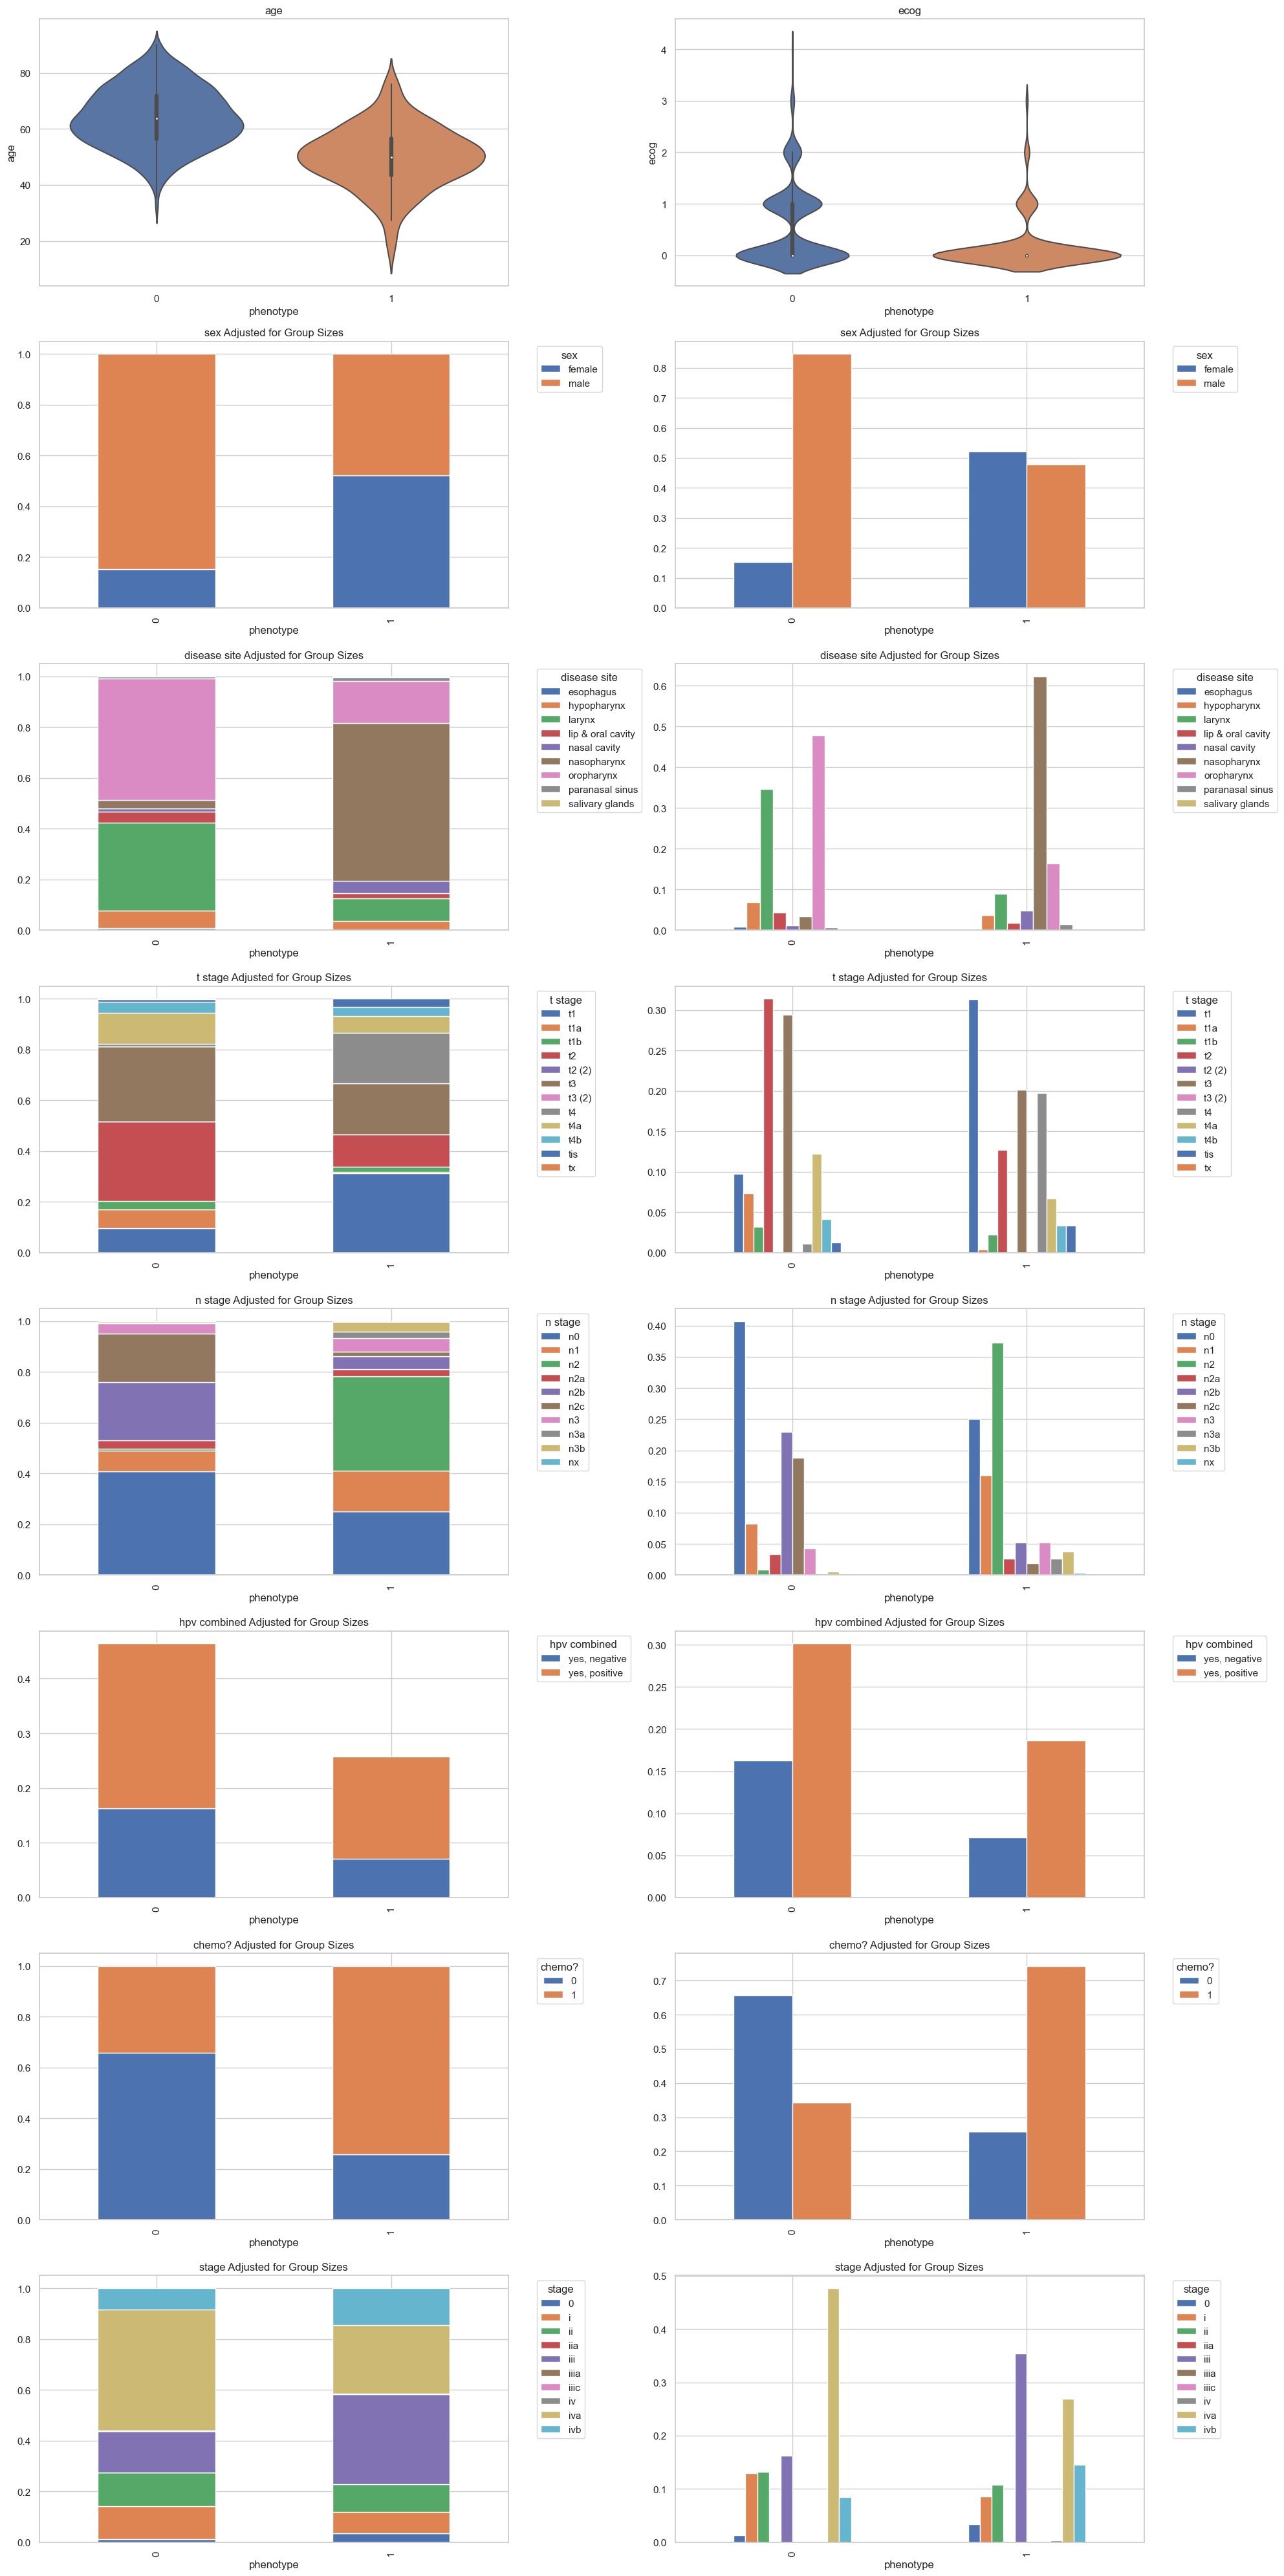

In [35]:

numeric_variables = ['age', 'ecog']
categorical_variables = ['sex', 'disease site', 't stage', 'n stage', 'hpv combined',
       'chemo?', 'stage']

total_plots = len(numeric_variables) + 2 * len(categorical_variables)  # for both stacked bar and clustered bar plots
n_cols = 2
n_rows = (total_plots + n_cols - 1) // n_cols

plt.figure(figsize=(20, n_rows * 5))  # Increased figure size for clarity

# Subplots for numeric variables (violin plots)
for i, var in enumerate(numeric_variables, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.violinplot(x='phenotype', y=var, data=df)
    plt.title(f'{var}')

# Subplots for categorical variables (normalized stacked bar and clustered bar plots)
for i, var in enumerate(categorical_variables):
    plt.subplot(n_rows, n_cols, len(numeric_variables) + 2*i + 1)
    
    # Normalized stacked bar chart
    group_size = df.groupby('phenotype').size()
    prop_df = (df.groupby(['phenotype', var])
               .size()
               .unstack()
               .div(group_size, axis=0))
    prop_df.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f'{var} Adjusted for Group Sizes')
    plt.legend(title=f'{var}', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Normalized clustered bar chart
    plt.subplot(n_rows, n_cols, len(numeric_variables) + 2*i + 2)
    prop_df.plot(kind='bar', ax=plt.gca())
    plt.title(f'{var} Adjusted for Group Sizes')
    plt.legend(title=f'{var}', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()